In [1]:
#enables charting in Jupyter
%matplotlib inline

# Getting Started

Welcome to your first 10 minutes with Pyrugga. In this tutorial you will learn how to convert a Superscout XML into a Match object and start some basic analyse a game of Rugby. 

The first step is to import Pyrugga library. This is as simple us typing 

In [94]:
import pyrugga as pyr

import matplotlib.pyplot as plt


Pyrugga requires a Super Scout file from Opta. These are stored in an XML format which is not great for statistical analysis, but useful for other things. We need to convert the XML format into something a little more friendly, a Pandas Dataframes.

In [33]:
df = pgr.Match('game_1.xml')

A Match object contains a number of functions and Dataframes to help us analyse a match 

**Dataframes**

* summary -- Summary of the match 
* events -- Description of each action 
* timeline -- A timeline of the match with periods ending when either possession of the ball changes or there was a stopage in play 
* players -- A list of players on each team with the positions they played and length of time on the pitch

**Functions**


* getTerritoryY -- amount of time each team spent in a zone (breadth of the pitch)
* getTerritoryX -- amount of time each team spent in a zone (length of the pitch)
* getTerritory -- amount of time each team spent in a zone (both breadth & length of the pitch)
* heatmap -- generates a heatmap for both teams filted by event 
* player_summary -- generates a summary of all players actions with the option to normilise base on : minutes played, phases or number of actions


to view the summary  line of a match

In [34]:
df.summary

,fixture_code,ref_id,ref_name,fixture_date,fx_week,awayteam,hometeam,home_score,away_score
0,719101,204,Peyper,27/10/2018,9,Natal Sharks,Western Province,12,17


to create a variable containing hometeam 

In [40]:
hometeam = df.summary.hometeam[0]

to access the first 10 events of a match 

In [41]:
df.events.head(10)

,action_id,additional,advantage,description,event,event_type,fixture_code,home_team_advantage,match_time,metres,...,ps_endstamp,ps_timestamp,set_num,shirt_no,team_name,x_coord,x_coord_end,y_coord,y_coord_end,points
0,18665513,NaN,0,NaN,Period,Start Period,719101.0,0,0,0,...,0,0,0,0.0,Western Province,50,0,34,0,0
0,18665514,NaN,0,NaN,Restart,50m Restart Kick,719101.0,0,0,0,...,0,0,0,15.0,Natal Sharks,50,75,34,57,0
94,18665515,NaN,0,NaN,Collection,Restart Catch,719101.0,0,4,0,...,4,4,1,11.0,Western Province,26,0,13,0,0
65,18665516,NaN,0,NaN,Turnover,Dropped Ball Unforced,719101.0,0,4,0,...,4,4,1,11.0,Western Province,26,0,13,0,0
98,18665517,NaN,0,NaN,Collection,Defensive Loose Ball,719101.0,0,5,0,...,5,5,1,6.0,Natal Sharks,76,0,54,0,0
218,18665518,Neutral Contact,0,Neutral,Carry,Other Carry,719101.0,0,7,0,...,7,7,1,6.0,Natal Sharks,76,0,54,0,0
404,18665519,NaN,0,NaN,Tackle,Line Tackle,719101.0,0,7,0,...,7,7,1,11.0,Western Province,24,0,14,0,0
137,18665520,NaN,0,NaN,Ruck,NaN,719101.0,0,7,0,...,7,7,1,0.0,Natal Sharks,75,0,52,0,0
680,18665521,NaN,0,NaN,Pass,Complete Pass,719101.0,0,7,0,...,7,7,1,9.0,Natal Sharks,75,0,52,0,0
231,18665522,Neutral Contact,0,Crossed Gainline,Carry,One Out Drive,719101.0,0,12,2,...,12,12,1,3.0,Natal Sharks,75,0,52,0,0


to see first 10 events for just the home team 

In [43]:
df.timeline.query('team_name == "%s"' % hometeam).head(10)

,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,dist_traveled,...,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive,Natal Sharks,Western Province,Natal Sharks_points,Western Province_points
2,1,3,Western Province,0,41,69,14,47,28,43.278170,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
5,1,6,Western Province,0,76,97,3,36,21,39.115214,...,1,0,0,0,0,0,0.0,0.0,0.0,0.0
6,1,7,Western Province,0,73,92,29,14,19,24.207437,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
10,1,11,Western Province,0,11,37,13,3,26,27.856777,...,0,0,0,0,2,0,0.0,0.0,0.0,0.0
11,1,12,Western Province,0,22,22,15,24,0,9.000000,...,1,0,0,0,0,0,0.0,0.0,0.0,0.0
12,1,13,Western Province,0,21,62,24,17,41,41.593269,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
14,1,15,Western Province,0,23,72,21,45,49,54.561891,...,0,0,0,0,0,1,0.0,0.0,0.0,0.0
16,1,17,Western Province,0,85,77,68,45,-8,24.351591,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
18,1,19,Western Province,0,21,85,37,3,64,72.470684,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
21,1,22,Western Province,0,37,82,46,58,45,46.572524,...,0,0,0,0,0,0,0.0,3.0,0.0,0.0


To view all players in the match and the time they have played

In [44]:
df.players

,fixture_code,team_id,player_id,team_name,players_name,min,shirt_no,position
0,719101,60,20959,Western Province,Alistair Vermaak,72,1,1
1,719101,60,18901,Western Province,Mbongeni Mbonami,40,2,2
2,719101,60,21708,Western Province,Wilco Louw,64,3,3
3,719101,60,21143,Western Province,Chris Van Zyl,55,4,4
4,719101,60,21712,Western Province,JD Schickerling,80,5,5
5,719101,60,24972,Western Province,Kobus Van Dyk,75,6,6
6,719101,60,25015,Western Province,Ernst van Rhyn,80,7,7
7,719101,60,21474,Western Province,Sikhumbuzo Notshe,56,8,8
8,719101,60,25242,Western Province,Hershel Jantjies,71,9,9
9,719101,60,22307,Western Province,Joshua Stander,71,10,10


To generate a heat map showing where both teams have kicked the ball 

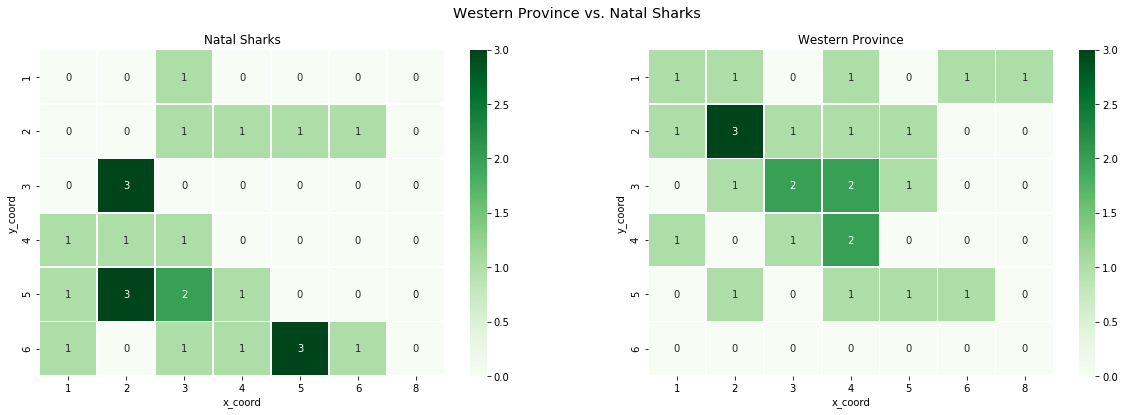

In [46]:
df.heat_map(event='Kick')

To get a summary of all players normilised by minutes on the pitch 

In [45]:
df.player_summary(norm='mins')

replacement  replaced  mins  \
team_name        position players_name                                        
Natal Sharks     1.0      Juan Schoeman                   0         0    80   
                 2.0      Armand van der Merwe            0         1    64   
                          Chiliboy Ralepelle              1         0    16   
                 3.0      Coenraad Oosthuizen             1         0    40   
                          Thomas du Toit                  0         1    40   
                 4.0      Gideon Koegelenberg             0         0    80   
                 5.0      Hyron Andrews                   0         0    80   
                 6.0      Tyler Paul                      0         1    74   
                 7.0      Jacques Vermeulen               1         0    25   
                          Jean-Luc du Preez               0         1    55   
                 8.0      Daniel du Preez                 0         0    80   
                 9.0      Cameron Wright                  1         0    18   
                          Louis Schreuder                 0         1    62   
                 10.0     Robert du Preez                 0         0    80   
                 11.0     Aphelele Fassi                  0         0    80   
                 12.0     Marius Louw                     0         0    80   
                 13.0     Jeremy Ward                     0         1    79   
                 14.0     Sibusiso Nkosi                  0         0    80   
                 15.0     Curwin Bosch                    0         0    59   
                          Jacobus Van Wyk                 1         0    21   
Western Province 1.0      Alistair Vermaak                0         1    72   
                          Caylib Oosthuizen               1         0     8   
                 2.0      Mbongeni Mbonami                0         1    40   
                          Siyabonga Ntubeni               1         0    40   
                 3.0      Michael Kumbirai                1         0    16   
                          Wilco Louw                      0         1    64   
                 4.0      Chris Van Zyl                   0         1    55   
                          Salmaan Moerat                  1         0    25   
                 5.0      JD Schickerling                 0         0    80   
                 6.0      Kobus Van Dyk                   0         1    75   
                 7.0      Ernst van Rhyn                  0         0    80   
                 8.0      Jaco Coetzee                    1         0    29   
                          Sikhumbuzo Notshe               0         1    56   
                 9.0      Hershel Jantjies                0         1    71   
                          Justin Phillips                 1         0     9   
                 10.0     Dan Kriel                       1         0     9   
                          Joshua Stander                  0         1    71   
                 11.0     JJ Engelbrecht                  1         0    31   
                          SP Marais                       0         1    49   
                 12.0     Damian Willemse                 0         0    80   
                 13.0     Ruhan Nel                       0         0    80   
                 14.0     Sergeal Petersen                0         0    80   
                 15.0     Dillyn Leyds                    0         0    80   

                                                actions  average_phase  \
team_name        position players_name                                   
Natal Sharks     1.0      Juan Schoeman              48       1.895833   
                 2.0      Armand van der Merwe       31       3.129032   
                          Chiliboy Ralepelle         12       3.666667   
                 3.0      Coenraad Oosthuizen        27       2.111111   
                          Thomas du Toit        

Break the match up into discrete events based on when possession of the ball changed teams

In [50]:
df.timeline

,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,dist_traveled,...,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive,Natal Sharks,Western Province,Natal Sharks_points,Western Province_points
0,1,1,Natal Sharks,0,74,75,55,22,1,33.015148,...,0,2,0,0,0,0,0.0,0.0,0.0,0.0
1,1,2,Natal Sharks,0,24,59,1,54,35,63.513778,...,1,0,0,0,0,1,0.0,0.0,0.0,0.0
2,1,3,Western Province,0,41,69,14,47,28,43.278170,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
3,1,4,Natal Sharks,0,31,102,21,49,71,76.321688,...,0,0,1,0,0,1,0.0,0.0,0.0,0.0
4,1,5,Natal Sharks,0,40,50,51,46,10,11.180340,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
5,1,6,Western Province,0,76,97,3,36,21,39.115214,...,1,0,0,0,0,0,0.0,0.0,0.0,0.0
6,1,7,Western Province,0,73,92,29,14,19,24.207437,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
7,1,8,Natal Sharks,0,4,38,54,67,34,36.400549,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
8,1,9,Natal Sharks,0,21,20,64,45,-1,19.026298,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
9,1,10,Natal Sharks,0,49,89,66,55,40,41.484937,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


# Your First Analysis

Now we have a handle on the basics lets try a basic analysis into understanding possession vs. territory. To count up the minutes each team had the ball we can sum the length field in the timeline grouping by team_name

In [51]:
df.timeline.groupby('team_name').sum()['length'] 

team_name
Natal Sharks        1349
Western Province     707
Name: length, dtype: int64

If we wanted to see this in a percentage we need to sum the column which requires adding another ".sum()"

In [52]:
df.timeline.groupby('team_name').sum()['length'] / (df.timeline.groupby('team_name').sum()['length'].sum())

team_name
Natal Sharks        0.656128
Western Province    0.343872
Name: length, dtype: float64

to plot this add .plot

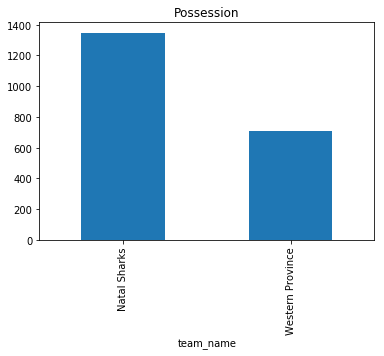

In [76]:
df.timeline.groupby('team_name').sum()['length'] \
.plot.bar(title="Possession")

So we have a pretty good read on who had the ball the most but what about where they had the ball. The TerritoryMetric function can help with that

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b2e78e550>],
      dtype=object)

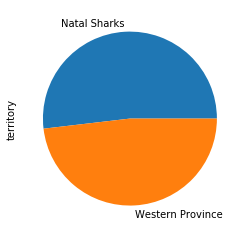

In [98]:
df.getTerritoryMetric().set_index('team_name').plot(kind='pie',subplots=True,legend=False)

We can also build out plots to see that territory in more detail. getTerritoryY gives us the width of play while getTerritoryX gives as the length of play

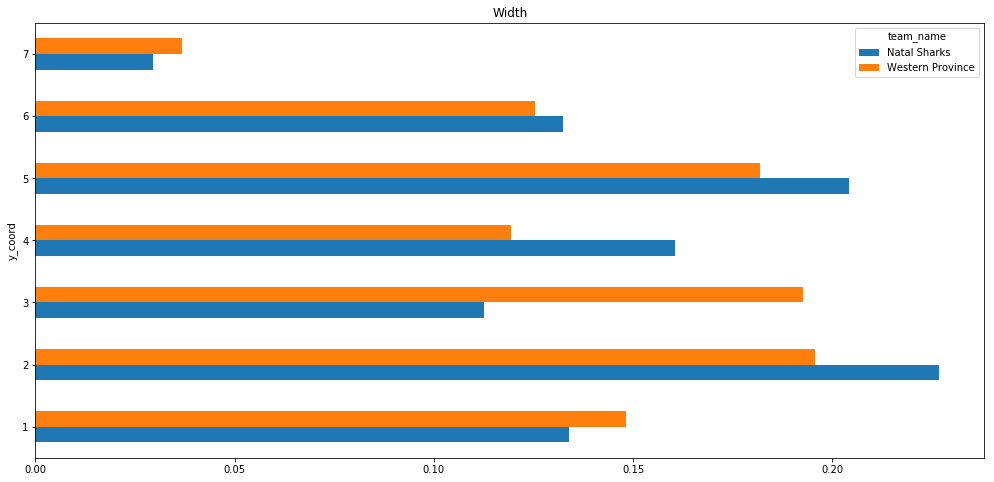

In [102]:
df.getTerritoryY(perc=True).plot(kind='barh',figsize=(17,8),title='Width')

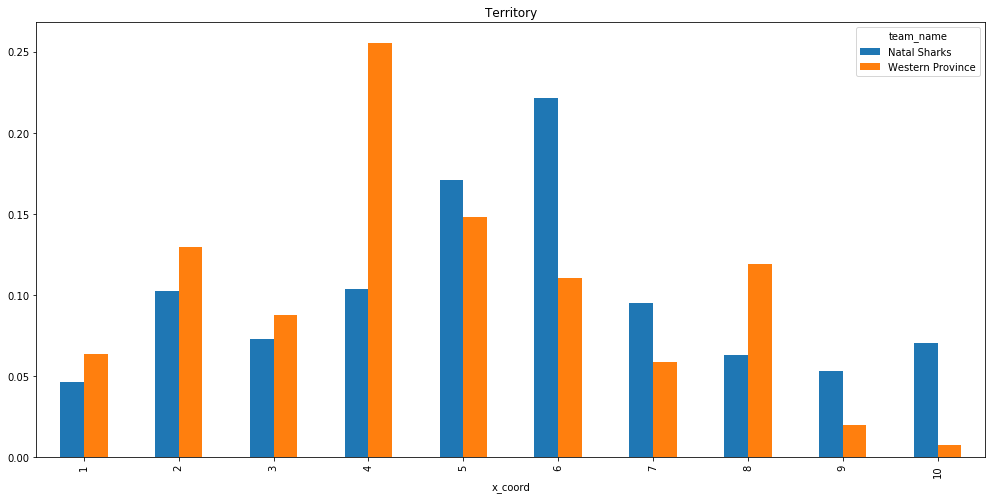

In [103]:
df.getTerritoryX(perc=True).plot(kind='bar',figsize=(17,8),title='Territory')

Heatmaps are also useful for seeing where events or actions occured in match. For example if we want to see where attachking sequences began for each team.

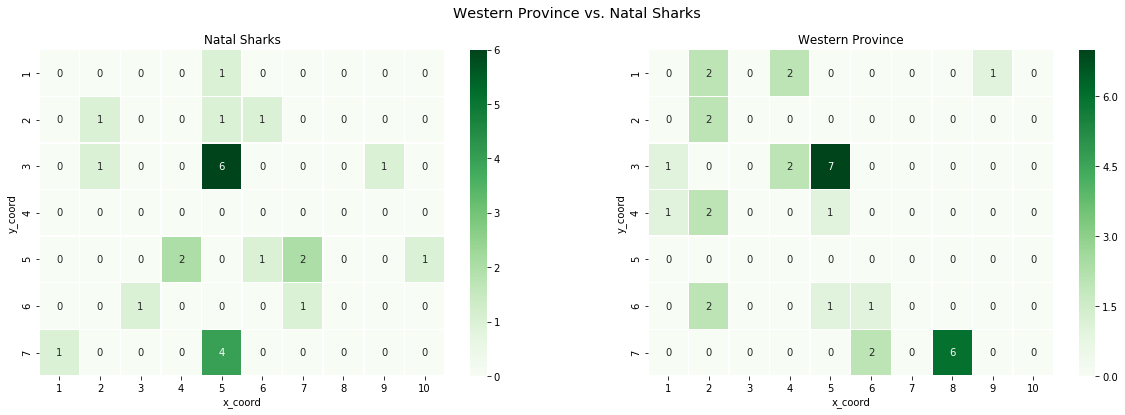

In [116]:
df.heat_map(event='Sequence')

To get a full list of events 

In [111]:
df.events.groupby('event').count()['action_id'].sort_values(ascending=False)

event
Tackle                 263
Pass                   196
Carry                  188
Ruck                   147
Collection              85
Possession              81
Sequence                73
Kick                    52
Offensive Scrum         48
Defensive Scrum         48
Attacking Qualities     40
Missed Tackle           33
Turnover                26
Scrum                   24
Lineout Throw           21
Lineout Take            20
Penalty Conceded        17
Period                  15
Ref Review              12
Restart                 12
Goal Kick               10
Maul                     8
Try                      2
Name: action_id, dtype: int64

In [114]:
df.events.groupby('event_type').count()['action_id'].sort_values(ascending=False)

event_type
Line Tackle                    179
Complete Pass                  161
Other Carry                     67
One Out Drive                   66
Scrum Half Pass                 40
Kick Return                     40
Scrum                           37
Lineout                         36
Defender Beaten                 33
Chase Tackle                    31
Defensive Loose Ball            24
50m Restart                     23
Pick And Go                     22
Other Tackle                    21
Guard Tackle                    21
Defensive Catch                 19
No 8 Pick Up                    15
Stepped                         15
Offload                         15
Box                             14
Territorial                     13
Restart Catch                   13
Turnover Won                    12
Bumped Off                      12
Touch Kick                      11
Support Carry                   11
Advantage                       11
Throw Middle                    10
Attacking

In [115]:
df.events.groupby('description').count()['action_id'].sort_values(ascending=False)

description
Crossed Gainline       66
Failed Gainline        58
Neutral                34
Kick In Play           32
Tackle Assist          18
Catch And Drive        16
Off The Top            14
Defence                12
Penalty Kick           11
Kick In Own 22          9
Catch And Pass          8
Retained Collection     6
Offence                 5
Negative                5
Initial Break           2
Positive                1
Name: action_id, dtype: int64